<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Présentation" data-toc-modified-id="Présentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Présentation</a></span></li><li><span><a href="#Librairies" data-toc-modified-id="Librairies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Lecture-des-données" data-toc-modified-id="Lecture-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lecture des données</a></span></li><li><span><a href="#Point-sur-les-techniques-d'augmentation" data-toc-modified-id="Point-sur-les-techniques-d'augmentation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Point sur les techniques d'augmentation</a></span></li><li><span><a href="#Generateur" data-toc-modified-id="Generateur-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generateur</a></span></li><li><span><a href="#Comparaison-des-modèles" data-toc-modified-id="Comparaison-des-modèles-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparaison des modèles</a></span><ul class="toc-item"><li><span><a href="#Définition-des-métriques" data-toc-modified-id="Définition-des-métriques-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Définition des métriques</a></span></li><li><span><a href="#Fonction-de-prédiction" data-toc-modified-id="Fonction-de-prédiction-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fonction de prédiction</a></span></li><li><span><a href="#Fonction-de-visualisation-de-l'entraînement" data-toc-modified-id="Fonction-de-visualisation-de-l'entraînement-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Fonction de visualisation de l'entraînement</a></span></li></ul></li><li><span><a href="#Initialisation-des-modèles" data-toc-modified-id="Initialisation-des-modèles-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Initialisation des modèles</a></span></li><li><span><a href="#Entraînement-des-modèles" data-toc-modified-id="Entraînement-des-modèles-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Entraînement des modèles</a></span></li><li><span><a href="#Visualisation-de-l'apprentissage" data-toc-modified-id="Visualisation-de-l'apprentissage-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualisation de l'apprentissage</a></span></li><li><span><a href="#Prédictions" data-toc-modified-id="Prédictions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Prédictions</a></span></li><li><span><a href="#Analyse-des-modèles" data-toc-modified-id="Analyse-des-modèles-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Analyse des modèles</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Présentation

Future Vision Transport est une entreprise qui conçoit des systèmes embarqués de vision par ordinateur pour les véhicules autonomes. Cette note technique se concentre sur la conception d’un premier modèle de segmentation d’images qui devra s’intégrer dans la chaîne complète du système embarqué.

Différents modèles seront testés afin de prendre une décision sur quel modèle adopter. Une fois le modèle choisis, une API Flask sera développé ainsi qu'une application web, afin de tester le modèle.

# Librairies

In [1]:
from tensorflow.keras.preprocessing import image
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cv2
import glob
import shutil
import os, json
from tqdm.notebook import tqdm
import pandas as pd

# Lecture des données

Les catégories peuvent être trouvées à partir de ce lien : https://www.cityscapes-dataset.com/dataset-overview/.
On a 5 000 images annotées avec des annotations fines.

D'après le dépo github https://github.com/mcordts/cityscapesScripts :
* 2975 train
* 1525 testing
* 500 validation

In [2]:
train_imgs = glob.glob("P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/*/*.png")
test_imgs = glob.glob("P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/test/*/*.png")
val_imgs = glob.glob("P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/*/*.png")

train_masks = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/train/*/*color.png")
test_masks = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/test/*/*color.png")
val_masks = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/val/*/*color.png")

train_mask_ids = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/train/*/*labelIds.png")
test_mask_ids = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/test/*/*labelIds.png")
val_mask_ids = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/val/*/*labelIds.png")

In [3]:
print("Longueur du set d'entraînement des images brutes :", len(train_imgs))
print("Longueur du set de test des images brutes :", len(test_imgs))
print("Longueur du set de validation des images brutes :", len(val_imgs))
print()
print("Longueur du set d'entraînement des masques :", len(train_masks))
print("Longueur du set de test des masques :", len(test_masks))
print("Longueur du set de validation des masques :", len(val_masks))
print()
print("Longueur du set d'entraînement des masques avec label :", len(train_mask_ids))
print("Longueur du set de test des masques avec label :", len(test_mask_ids))
print("Longueur du set de validation des masques avec label :", len(val_mask_ids))

Longueur du set d'entraînement des images brutes : 2975
Longueur du set de test des images brutes : 1525
Longueur du set de validation des images brutes : 500

Longueur du set d'entraînement des masques : 2975
Longueur du set de test des masques : 1525
Longueur du set de validation des masques : 500

Longueur du set d'entraînement des masques avec label : 2975
Longueur du set de test des masques avec label : 1525
Longueur du set de validation des masques avec label : 500


In [4]:
# Réorganisation des fichiers

# Chemins de destination
train_imgs_dir = 'dataset/color/train/'
test_imgs_dir = 'dataset/color/test/'
val_imgs_dir = 'dataset/color/val/'

train_masks_dir = 'dataset/masks/train/'
test_masks_dir = 'dataset/masks/test/'
val_masks_dir = 'dataset/masks/val/'

train_mask_ids_dir = 'dataset/ids/train/'
test_mask_ids_dir = 'dataset/ids/test/'
val_mask_ids_dir = 'dataset/ids/val/'

In [5]:
# src_paths = [
#     train_imgs, test_imgs, val_imgs,
#     train_masks, test_masks, val_masks,
#     train_mask_ids, test_mask_ids, val_mask_ids
# ]

# dst_paths = [
#     train_imgs_dir, test_imgs_dir, val_imgs_dir,
#     train_masks_dir, test_masks_dir, val_masks_dir,
#     train_mask_ids_dir, test_mask_ids_dir, val_mask_ids_dir
# ]

# for src_path, dst_path in zip(src_paths, dst_paths):
#     for file_path in tqdm(src_path):
        
#         shutil.copy(file_path, dst_path)

In [6]:
# for folder in tqdm(dst_paths):
#     for image_file in tqdm(os.listdir(folder)):
#         # Renaming files
#         old_name = folder+image_file
#         if "leftImg8bit" in image_file:
#             new_name = "_".join(old_name.split("_")[0:-1])+".png"
#         else:
#             new_name = "_".join(old_name.split("_")[0:-2])+".png"
#         os.rename(old_name, new_name)

In [7]:
X_y_train = pd.DataFrame(data={
    'train_images_path': train_imgs,
    'train_masks_path': train_masks,
    'train_masks_ids': train_mask_ids
})
X_y_train

train_images_path  \
0     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
3     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
4     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
...                                                 ...   
2970  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2971  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2972  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2973  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2974  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   

                                       train_masks_path  \
0     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
1     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
2     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
3     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
4     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
...                                                 ...   
2970  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
2971  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
2972  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
2973  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   
2974  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...   

                                        train_masks_ids  
0     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
1     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
2     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
3     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
4     P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
...                                                 ...  
2970  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
2971  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
2972  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
2973  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  
2974  P8_Cityscapes_gtFine_trainvaltest/gtFine/train...  

[2975 rows x 3 columns]

In [8]:
X_y_test = pd.DataFrame(data={
    'test_images_path': test_imgs,
    'test_masks_path': test_masks,
    'test_masks_ids': test_mask_ids
})
X_y_test

test_images_path  \
0     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
3     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
4     P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
...                                                 ...   
1520  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1521  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1522  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1523  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1524  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   

                                        test_masks_path  \
0     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
1     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
2     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
3     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
4     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
...                                                 ...   
1520  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
1521  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
1522  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
1523  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   
1524  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...   

                                         test_masks_ids  
0     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
1     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
2     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
3     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
4     P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
...                                                 ...  
1520  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
1521  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
1522  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
1523  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  
1524  P8_Cityscapes_gtFine_trainvaltest/gtFine/test\...  

[1525 rows x 3 columns]

In [9]:
X_y_val = pd.DataFrame(data={
    'val_images_path': val_imgs,
    'val_masks_path': val_masks,
    'val_masks_ids': val_mask_ids
})
X_y_val

val_images_path  \
0    P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
1    P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
2    P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
3    P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
4    P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
..                                                 ...   
495  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
496  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
497  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
498  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   
499  P8_Cityscapes_leftImg8bit_trainvaltest/leftImg...   

                                        val_masks_path  \
0    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...   
1    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...   
2    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...   
3    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...   
4    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...   
..                                                 ...   
495  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...   
496  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...   
497  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...   
498  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...   
499  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...   

                                         val_masks_ids  
0    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...  
1    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...  
2    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...  
3    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...  
4    P8_Cityscapes_gtFine_trainvaltest/gtFine/val\f...  
..                                                 ...  
495  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...  
496  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...  
497  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...  
498  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...  
499  P8_Cityscapes_gtFine_trainvaltest/gtFine/val\m...  

[500 rows x 3 columns]

À chaque image, un fichier json d'annotations est associé. Chaque fichier est nommé avec un id.

Par exemple, un fichier json sera nommé : <code>berlin_000000_000019_gtFine_polygons.json</code>. L'id est la partie <code>berlin_000000_000019</code>. Les fichiers json sont situés dans les dossiers des masques.

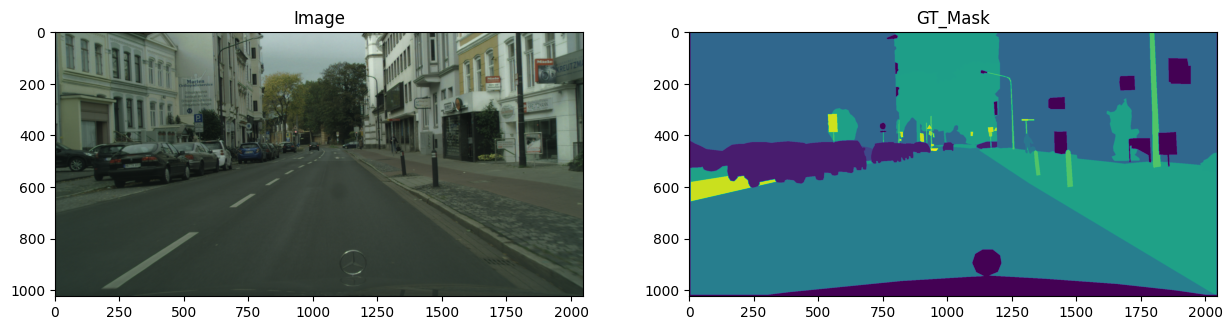

In [10]:
import random

# Les masques en couleurs ne sont disponibles que pour les sets d'entrainement
# et de validation.
i = random.randint(0, len(test_imgs))
test_image = image.img_to_array(image.load_img(f'{train_imgs[i]}'))/255.
test_mask = image.img_to_array(image.load_img(f'{train_masks[i]}', color_mode="grayscale"))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(test_image)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('GT_Mask')
ax1.imshow(test_mask)

Ci-dessus, des exemples d'annotations en pixels denses de haute qualité qui sont fournit pour un volume de 5 000 images (et 2975 pour les masques). Les couleurs superposées codent les classes sémantiques.

Chaque image comprend les étiquettes correspondantes et les masques pixel par pixel. Les masques sont des étiquettes de classe pour chaque pixel. Chaque pixel se voit attribuer l'une des 8 catégories suivantes :
* flat
* human
* vehicle
* construction
* object
* nature
* sky
* void

Ci-dessous, le json des annotations qui est associé à l'image, avec la position en pixel de l'objet.

In [11]:
train_jsons = glob.glob("P8_Cityscapes_gtFine_trainvaltest/gtFine/train/*/*.json")
annotations = open(train_jsons[i])
annotations = json.load(annotations)
annotations

{'imgHeight': 1024,
 'imgWidth': 2048,
 'objects': [{'label': 'sky',
   'polygon': [[749, 85],
    [777, 329],
    [910, 358],
    [1217, 368],
    [1256, 217],
    [1256, 0],
    [722, 0],
    [734, 52]]},
  {'label': 'road',
   'polygon': [[296, 469],
    [879, 439],
    [923, 427],
    [1308, 435],
    [2048, 535],
    [2048, 1024],
    [0, 1024],
    [0, 552]]},
  {'label': 'building',
   'polygon': [[891, 250],
    [894, 277],
    [1092, 243],
    [1199, 253],
    [1212, 434],
    [1049, 443],
    [948, 441],
    [840, 444],
    [793, 445],
    [796, 213],
    [813, 215],
    [819, 243]]},
  {'label': 'vegetation',
   'polygon': [[882, 434],
    [881, 348],
    [874, 341],
    [868, 336],
    [868, 335],
    [863, 334],
    [863, 334],
    [858, 338],
    [854, 346],
    [845, 354],
    [844, 356],
    [835, 371],
    [833, 380],
    [831, 388],
    [822, 392],
    [805, 396],
    [796, 398],
    [790, 395],
    [792, 385],
    [796, 375],
    [798, 365],
    [797, 361],
    [798,

Les étiquettes peuvent être récupérées soit en récupérant le code couleur RGB du masque qui a le suffixe <code>color.png</code>, soit avec le masque en nuance de gris qui a le suffixe <code>labelIds.png</code>.

Ensuite, on peut faire la correspondance avec les catégorie comme dans ce code (script CityScapes officiel) : https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

In [12]:
img_height, img_width = 256, 512

_image = image.img_to_array(image.load_img(
    f'{train_imgs[i]}', target_size=(img_height, img_width)))/255.

mask_label_id = image.img_to_array(image.load_img(
    f'{train_mask_ids[i]}', color_mode="grayscale", target_size=(img_height, img_width)))

labels = np.unique(mask_label_id)
print("Labels uniques trouvés dans l'image :", labels)

Labels uniques trouvés dans l'image : [ 1.  3.  4.  7.  8.  9. 11. 17. 19. 20. 21. 22. 23. 24. 26. 33.]


# Point sur les techniques d'augmentation
https://neptune.ai/blog/data-augmentation-in-python

**Qu'est-ce que l'augmentation de données ?**

L'augmentation des données est une technique qui peut être utilisée pour augmenter artificiellement la taille d'un ensemble d'entraînement en créant des données modifiées à partir de l'ensemble existant. L'augmentation de données est une bonne pratique si on veut éviter le sur-entraînement, si l'ensemble de données initial est trop petit pour l'entraînement, ou même si on veut obtenir de meilleures performances sur le modèle.

L'augmentation des données n'est pas uniquement utilisée pour éviter le sur-entraînement. En général, il est essentiel de disposer d'un grand ensemble de données pour améliorer les performances des modèles de Machine Learning et de Deep Learning. Cependant, nous pouvons améliorer les performances du modèle en augmentant les données dont nous disposons déjà.

**Les techniques d'augmentation des données**

Nous pouvons appliquer diverses modifications aux données initiales. Par exemple, pour les images, nous pouvons utiliser :

* Transformations géométriques - retourner, recadrer, faire pivoter ou translater des images de manière aléatoire.
* Transformations de l'espace couleur - modifier les canaux de couleur RVB, intensifier n'importe quelle couleur.
* Filtres à noyaux - pour rendre une image plus nette ou plus floue. 
* Effacement aléatoire - supprimer une partie de l'image initiale
* Mélange d'images - il s'agit essentiellement de mélanger des images entre elles.

**Augmentation des données avec la librairie "imgaug"**.

La librairie imgaug permet de choisir un paramètre de probabilité pour chaque opération de transformation. Ce paramètre contrôle la fréquence à laquelle l'opération est appliquée. Ainsi, imgaug permet de former une pipeline d'augmentation qui enchaîne un certain nombre d'opérations qui sont appliquées. 

Cela signifie qu'à chaque fois qu'une image est passée dans la pipeline, une image complètement différente est retournée. En fonction du nombre d'opérations dans la pipeline et du paramètre de probabilité, une très grande quantité de nouvelles données d'image peut être créée.

Que pouvons-nous faire avec les images en utilisant imgaug ? Les principales caractéristiques de la librairie imgaug sont les suivantes :

* Perspective skewing - mettre une image sous un angle différent.
* Distorsions élastiques - ajouter des distorsions à une image
* Rotation - pivoter une image
* Cisaillement - incliner une image sur l'un de ses côtés.
* Recadrage - recadrer une image
* Miroir : appliquer différents types de retournements.

In [13]:
from imgaug import augmenters as iaa
import imgaug as ia

In [35]:
ia.seed(1)

# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
# image.
sometimes = lambda aug: iaa.Sometimes(1, aug)

# Define our sequence of augmentation steps that will be applied to every image.
seq = iaa.Sequential([
                sometimes(iaa.OneOf([
                    # Drop randomly 1 to 10% of all pixels (i.e. set
                    # them to black) or drop them on an image with 2-5% percent
                    # of the original size, leading to large dropped
                    # rectangles.
                    iaa.Dropout((0.01, 0.1), per_channel=0.5),
                    
                    # In some images move pixels locally around (with random
                    # strengths).
                    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
                    
                    # In some images distort local areas with varying strength.
                    iaa.PiecewiseAffine(scale=(0.01, 0.05))
                ]),)
    ])

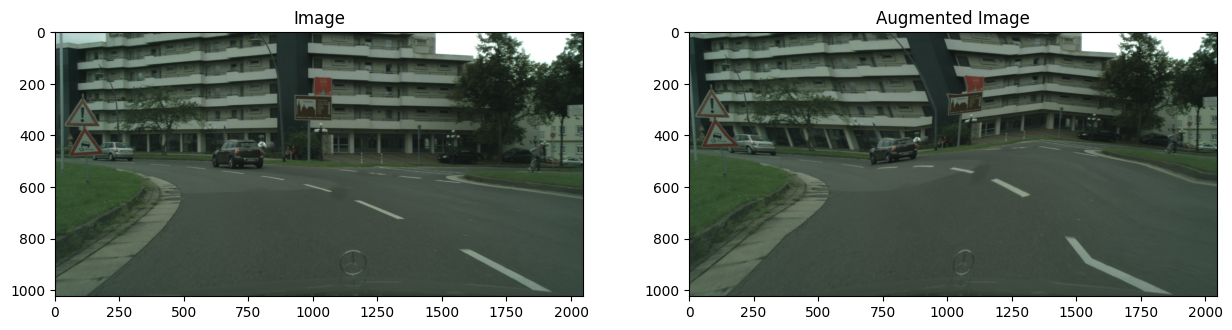

In [42]:
i = 0
test_image = image.img_to_array(image.load_img(f'{train_imgs[i]}'))/255.

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(test_image)

test_image_aug = seq.augment_image(test_image)
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Augmented Image')
ax1.imshow(test_image_aug)

# Generateur

Nous devons garder à l'esprit que dans certains cas, même la configuration la plus moderne ne disposera pas d'un espace mémoire suffisant pour traiter les données. C'est la raison pour laquelle nous devons trouver d'autres moyens d'effectuer cette tâche efficacement. Dans cette partie, nous allons alimenter immédiatement le modèle d'apprentissage profond en générant des images en temps réel.

Les images target « mask » à prendre dans le dataset sont celles nommées « gtFine_labelIds », qui contiennent 34 valeurs différentes, correspondant aux 34 classes de base (d’où le gris foncé de l’image à l’affichage). Il convient dans la « class » de type « sequence » (traitement à la volée des images) de transformer les 34 classes en 8 catégories telles que définies

BASELINE : UNET

##### Traces de recherche

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://www.kaggle.com/code/mpalermo/keras-pipeline-custom-generator-imgaug/script

https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

https://github.com/srihari-humbarwadi/cityscapes-segmentation-with-Unet/blob/master/batch_training.py

https://github.com/lim-anggun/Keras-ImageDataGenerator/blob/master/README.md

https://www.kaggle.com/code/c0conuts/unet-imagedatagenerator-lb-0-336/notebook

https://www.kaggle.com/code/michaelcripman/road-segmentation-unet-keras-implementation/notebook

https://keras.io/examples/vision/oxford_pets_image_segmentation/

https://stackoverflow.com/questions/56517963/keras-imagedatagenerator-for-segmentation-with-images-and-masks-in-separate-dire

https://pypi.org/project/segmentation-models/0.1.2/

https://www.kaggle.com/code/mukulkr/camvid-segmentation-using-unet/notebook

https://github.com/srihari-humbarwadi/cityscapes-segmentation-with-Unet/blob/master/batch_training.py

In [14]:
from collections import namedtuple



# Adaptation from the official Cityscapes scripts
# https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

#--------------------------------------------------------------------------------
# Definitions : 
#--------------------------------------------------------------------------------
# Create tuple subclasses with named fields
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name the 30 classes

    'id'          , # An integer ID that is associated with this label.

    'categoryId'  , # IDs of labels which match to pixel values
                    # corresponding to the 8 main categories.

    'category'    , # The name of the category that this label belongs to
    ] )

#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

labels = [
    #name                             id    catId   category
    Label(  'unlabeled'            ,  0 ,      0 , 'void'),
    Label(  'ego vehicle'          ,  1 ,      0 , 'void'),
    Label(  'rectification border' ,  2 ,      0 , 'void'),
    Label(  'out of roi'           ,  3 ,      0 , 'void'),
    Label(  'static'               ,  4 ,      0 , 'void'),
    Label(  'dynamic'              ,  5 ,      0 , 'void'),
    Label(  'ground'               ,  6 ,      0 , 'void'),
    Label(  'road'                 ,  7 ,      1 , 'flat'),
    Label(  'sidewalk'             ,  8 ,      1 , 'flat'),
    Label(  'parking'              ,  9 ,      1 , 'flat'),
    Label(  'rail track'           , 10 ,      1 , 'flat'),
    Label(  'building'             , 11 ,      2 , 'construction'),
    Label(  'wall'                 , 12 ,      2 , 'construction'),
    Label(  'fence'                , 13 ,      2 , 'construction'),
    Label(  'guard rail'           , 14 ,      2 , 'construction'),
    Label(  'bridge'               , 15 ,      2 , 'construction'),
    Label(  'tunnel'               , 16 ,      2 , 'construction'),
    Label(  'pole'                 , 17 ,      3 , 'object'),
    Label(  'polegroup'            , 18 ,      3 , 'object'),
    Label(  'traffic light'        , 19 ,      3 , 'object'),
    Label(  'traffic sign'         , 20 ,      3 , 'object'),
    Label(  'vegetation'           , 21 ,      4 , 'nature'),
    Label(  'terrain'              , 22 ,      4 , 'nature'),
    Label(  'sky'                  , 23 ,      5 , 'sky'),
    Label(  'person'               , 24 ,      6 , 'human'),
    Label(  'rider'                , 25 ,      6 , 'human'),
    Label(  'car'                  , 26 ,      7 , 'vehicle'),
    Label(  'truck'                , 27 ,      7 , 'vehicle'),
    Label(  'bus'                  , 28 ,      7 , 'vehicle'),
    Label(  'caravan'              , 29 ,      7 , 'vehicle'),
    Label(  'trailer'              , 30 ,      7 , 'vehicle'),
    Label(  'train'                , 31 ,      7 , 'vehicle'),
    Label(  'motorcycle'           , 32 ,      7 , 'vehicle'),
    Label(  'bicycle'              , 33 ,      7 , 'vehicle'),
    Label(  'license plate'        , -1 ,      7 , 'vehicle')]

# Function to map labels and categories
def map_id2category(labels):
    """ This function maps the ~30 labels' IDs
        to the 8 main categories' IDs
    """
    cat_label = {label.id: label.categoryId for label in labels}
    
    # Get the mapping
    map_category = np.vectorize(cat_label.get)
    return map_category

In [15]:
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img



class DataGenerator(Sequence):
    """Generate data for Keras
    """

    # ==== Initialize the class ==== #
    def __init__(self, input_path, target_path, img_size, batch_size, 
                 labels, n_classes, shuffle, augment=False):
        
        self.input_path = input_path
        self.target_path = target_path
        self.targetSize = img_size
        self.batch_size = batch_size
        self.labels = labels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()


    # ==== Set the number of batches per epoch ==== #
    def __len__(self):
        return int(np.floor(len(self.input_path) / float(self.batch_size)))
    
    
    # ==== Call a method at the end of each epoch ==== #
    def on_epoch_end(self):
        # [0,1,2,3,4... nb_image]
        self.indexes = np.arange(len(self.input_path))

        # [2,4,1,3,0... nb_image]
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    
    # ==== Get batches of images & masks ==== #
    def __getitem__(self, index):
        # Genere batch_size nombre d'ID de row de DATA (batch_size=2, [0,1])
        currentBatchIdsRow = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        batch_x, batch_y = [], []
    
        # Iterate over indexes
        for i, rowId in enumerate(currentBatchIdsRow):
            # Load image, set target size, convert to array, normalize
            image = img_to_array(
               load_img(f'{self.input_path[i]}', 
                        target_size=img_size))/255.
            batch_x.append(image)
            
            # Load original mask, set target size and convert to array
            mask30 = img_to_array(
               load_img(f'{self.target_path[i]}', color_mode = "grayscale", 
                        target_size=img_size))

            # Map the 30 classes to 8 main categories
            map_category = map_id2category(labels)
            mask = map_category(mask30)
            mask = to_categorical(mask, self.n_classes)                
            batch_y.append(mask)
            
        if self.augment == True:
            batch_x, batch_y = self.augmentor(batch_x, batch_y)

#             batch_x = np.array([preprocess_input(img) for img in batch_x])
#             batch_y = np.array([preprocess_input(img) for img in batch_y])
        
        return np.array(batch_x), np.array(batch_y)
    
    
    # ==== Apply data augmentation ==== #
    def augmentor(self, batch_x_, batch_y_):
        # Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
        # e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
        # image.
        sometimes = lambda aug: iaa.Sometimes(0.2, aug)

        # Define our sequence of augmentation steps that will be applied to every image.
        seq = iaa.Sequential([
                        sometimes(iaa.OneOf([
                            # Drop randomly 1 to 10% of all pixels (i.e. set
                            # them to black) or drop them on an image with 2-5% percent
                            # of the original size, leading to large dropped
                            # rectangles.
                            iaa.Dropout((0.01, 0.1), per_channel=0.5),

                            # In some images move pixels locally around (with random
                            # strengths).
                            iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),

                            # In some images distort local areas with varying strength.
                            iaa.PiecewiseAffine(scale=(0.01, 0.05))
                        ]),)
            ])
        
        return seq.augment_images(batch_x_), seq.augment_images(batch_y_)

In [16]:
img_size = (256, 512)
batch_size = 16
n_classes = 8

# Generate train data
trainGen = DataGenerator(train_imgs, train_mask_ids, img_size, 
                         batch_size, labels, n_classes, shuffle=False)
trainGenaug = DataGenerator(train_imgs, train_mask_ids, img_size,
                            batch_size, labels, n_classes, shuffle=False, augment=True)

# Generate validation data
valGen = DataGenerator(val_imgs[:400], val_mask_ids[:400], img_size, 
                       batch_size, labels, n_classes, shuffle=False)

valGen2 = DataGenerator(val_imgs[400:], val_mask_ids[400:], img_size, 
                       batch_size, labels, n_classes, shuffle=False)

# Check data shape
X_train, y_train = trainGen[0]
print('Train shapes (X and y): ', X_train.shape, y_train.shape)

X_train_aug, y_train_aug = trainGenaug[0]
print('Train shapes (X_aug and y_aug): ', X_train_aug.shape, y_train_aug.shape)

X_val, y_val = valGen[0]
print('Val shapes (X and y): ', X_val.shape, y_val.shape)

Train shapes (X and y):  (16, 256, 512, 3) (16, 256, 512, 8)
Train shapes (X_aug and y_aug):  (16, 256, 512, 3) (16, 256, 512, 8)
Val shapes (X and y):  (16, 256, 512, 3) (16, 256, 512, 8)


# Comparaison des modèles

https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html

https://github.com/qubvel/segmentation_models

https://github.com/divamgupta/image-segmentation-keras

In [21]:
from tensorflow import keras
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D
from time import time

import plotly.graph_objects as go
from plotly.subplots import make_subplots

%load_ext tensorboard

## Définition des métriques

Le IoU score (Intersection over Union) est un nombre compris entre 0 et 1 qui quantifie la proportion de chevauchement entre le masque cible et le masque prédit.
Un IoU score de 0 signifie qu’il n’y a pas de chevauchement, un IoU score de 1 signifie que l’union des masques est complète.

C'est une métrique pertinente et couramment utilisée pour les sujets de segmentation d'images.

In [22]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


score_IoU = tf.keras.metrics.OneHotMeanIoU(num_classes=8, name='mean_IoU')

## Fonction de prédiction

In [23]:
def rgb_seg_img(seg_arr, n_classes):
    
    class_colors = {
        0:(0,0,0),        # void
        1:(128, 64, 128), # flat
        2:(102,102,156),  # construction
        3:(153,153,153),  # object
        4:(107, 142, 35), # nature
        5:(70,130,180),   # sky
        6:(255, 0, 0),    # human
        7:(0, 0, 142)     # vehicle
    }
    
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_arr_c = seg_arr[:, :] == c
        seg_img[:, :, 0] += ((seg_arr_c) * (class_colors[c][0])).astype('uint8') # R
        seg_img[:, :, 1] += ((seg_arr_c) * (class_colors[c][1])).astype('uint8') # G
        seg_img[:, :, 2] += ((seg_arr_c) * (class_colors[c][2])).astype('uint8') # B

    return seg_img.astype('uint8')


def predict_image(idx, model):
    
    img = val_imgs[idx]
    img = image.img_to_array(image.load_img(img))/255
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1, 3, 1)
    ax.set_title('Image')
    ax.imshow(img)
    
    mask = img_to_array(load_img(f'{val_masks[idx]}', color_mode="grayscale"))
    mask = np.squeeze(mask)
    
    x = cv2.resize(img, (512, 256))
    z = model.predict(np.expand_dims(x, axis=0))
    
    pred_mask = np.argmax(z, axis=-1)
    pred_mask = np.expand_dims(pred_mask, axis=-1)
    pred_mask = np.squeeze(pred_mask)
#     pred_mask = rgb_seg_img(pred_mask, 8)
    
    ax1 = fig.add_subplot(1, 3, 2)
    ax1.set_title('true_Mask')
    ax1.imshow(mask)
    ax1.axis('off')
    
    ax2 = fig.add_subplot(1, 3, 3)
    ax2.set_title('pred')
    ax2.imshow(pred_mask)
    
    return pred_mask

In [24]:
model = tf.keras.models.load_model(
    "checkpoints"+f'/unet_vgg16.h5', custom_objects={'mean_IoU': score_IoU, 'dice_coeff': dice_coeff})

1/1 [==============================] - 1s 1s/step


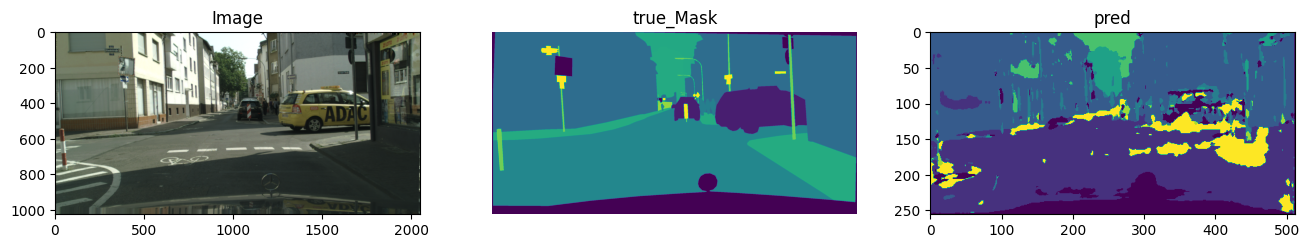

In [25]:
pred_ = predict_image(0, model)

## Fonction de visualisation de l'entraînement

In [26]:
# Function to plot learning curves
def plot_graphs(history):
    plt.figure(figsize=(16,4))
    
    plt.subplot(131)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'])
    
    plt.subplot(132)
    plt.plot(history.history['mean_IoU'])
    plt.plot(history.history['val_mean_IoU'])
    plt.xlabel('Epochs')
    plt.ylabel('mean_IoU')
    plt.legend(['mean_IoU', 'val_mean_IoU'])
    
    plt.subplot(133)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

In [27]:
def plot_history_graph(history):
    """Plotly version of displaying the history graph"""
    # Create figure
    fig = make_subplots()
    # Add traces
    fig.add_trace(
        go.Scatter(y=history.history['loss'], name="loss")
    )
    fig.add_trace(
        go.Scatter(y=history.history['val_loss'], name="val_loss")
    )
    # Add figure title
    fig.update_layout(
        title_text="Loss score of the model"
    )
    # Set x-axis title
    fig.update_xaxes(title_text="Epoch")
    fig.show()

    # Create figure
    fig = make_subplots()
    fig.add_trace(
        go.Scatter(y=history.history['val_accuracy'], name="val accuracy")
    )
    fig.add_trace(
        go.Scatter(y=history.history['accuracy'], name="accuracy")
    )
    # Add figure title
    fig.update_layout(
        title_text="Accuracy score of the model"
    )
    # Set x-axis title
    fig.update_xaxes(title_text="Epoch")
    fig.show()

    # Create figure
    fig = make_subplots()
    fig.add_trace(
        go.Scatter(y=history.history['mean_IoU'], name="mean_IoU")
    )
    fig.add_trace(
        go.Scatter(y=history.history['val_mean_IoU'], name="val_mean_IoU")
    )
    # Add figure title
    fig.update_layout(
        title_text="IoU score of the model"
    )
    # Set x-axis title
    fig.update_xaxes(title_text="Epoch")
    fig.show()

# Initialisation des modèles

In [28]:
# from keras_segmentation.models.pspnet import pspnet
# from keras_segmentation.models.segnet import segnet
# from keras_segmentation.models.fcn import fcn_8
import segmentation_models as sm

Segmentation Models: using `keras` framework.


https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47

https://developers.arcgis.com/python/guide/how-unet-works/

https://www.robots.ox.ac.uk/~vgg/research/very_deep/

https://cs231n.github.io/convolutional-networks/

https://www.mygreatlearning.com/blog/introduction-to-vgg16/

https://keras.io/api/applications/

In [29]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    
    return model

In [30]:
models = {
    "baseline_unet": get_model(img_size, num_classes=n_classes),
    "baseline_unet_aug": get_model(img_size, num_classes=n_classes),
    "unet_vgg16": sm.Unet('vgg16', classes=8),
    "unet_vgg16_aug": sm.Unet('vgg16', classes=8),
    "fpn": sm.FPN(classes=8),
    "fpn_aug": sm.FPN(classes=8)
}

# Entraînement des modèles

In [31]:
models_history = {}
for model_name, model in tqdm(models.items()):
    # Compiling
    print(f'Compiling {model_name}')
    model.compile(optimizer="adam", 
                  loss="categorical_crossentropy",
                  metrics=[score_IoU, dice_coeff, 'accuracy'])

    # Training
    print(f'Training {model_name}')

    callbacks = [
        ModelCheckpoint(
                    filepath="checkpoints" +f'/{model_name}.h5',
                    save_best_only=True,
                    verbose=True
                ),
        EarlyStopping(patience=2),
        TensorBoard(log_dir=f'logs/{model_name}', write_graph=True)
    ]
    
    start = time()
    if "aug" in model_name:
        model_history = model.fit(trainGenaug,
                                  epochs=5,
                                  validation_data=valGen,
                                  workers=12,
                                  callbacks=callbacks)
    else:
        model_history = model.fit(trainGen,
                                  epochs=5,
                                  validation_data=valGen,
                                  workers=12,
                                  callbacks=callbacks)
        
    models_history[model_name] = model_history

    training_time = time() - start
    print(f'Training time : {training_time}')
    
    # Saving
    print(f'Saving the model {model_name}')
    model.save("checkpoints"+f'/{model_name}.h5')
    
    # Evaluating the model
    print(f'Evaluating model {model_name}')
    benchmark = {}
    model_eval = model.evaluate(valGen2, verbose=1)
    benchmark["model_name"] = model_name
    benchmark["training_time"] = training_time
    metrics = ["val_loss", "val_mean_IoU", "val_dice_coeff", "val_accuracy"]
    for i, metric in enumerate(model_eval):
        benchmark[metrics[i]] = metric
        
    # Saving the result
    pd.DataFrame(benchmark, index=[0]).to_csv(f"model_results/{model_name}_eval.csv", index=False)

    K.clear_session()

  0%|          | 0/1 [00:00<?, ?it/s]

Compiling unet_vgg16_aug
Training unet_vgg16_aug
Epoch 1/5
185/185 [==============================] - ETA: 0s - loss: 0.4289 - mean_IoU: 0.5659 - dice_coeff: 0.4812 - accuracy: 0.8693 
Epoch 1: val_loss improved from inf to 0.91547, saving model to checkpoints\unet_vgg16_aug.h5
185/185 [==============================] - 4298s 23s/step - loss: 0.4289 - mean_IoU: 0.5659 - dice_coeff: 0.4812 - accuracy: 0.8693 - val_loss: 0.9155 - val_mean_IoU: 0.3403 - val_dice_coeff: 0.4808 - val_accuracy: 0.7423
Epoch 2/5
185/185 [==============================] - ETA: 0s - loss: 0.1470 - mean_IoU: 0.8094 - dice_coeff: 0.6304 - accuracy: 0.9518 
Epoch 2: val_loss did not improve from 0.91547
185/185 [==============================] - 4433s 24s/step - loss: 0.1470 - mean_IoU: 0.8094 - dice_coeff: 0.6304 - accuracy: 0.9518 - val_loss: 1.2696 - val_mean_IoU: 0.3886 - val_dice_coeff: 0.5404 - val_accuracy: 0.7101
Epoch 3/5
185/185 [==============================] - ETA: 0s - loss: 0.1198 - mean_IoU: 0.8448

# Visualisation de l'apprentissage

Lors de l'entraînement d'un modèle, l'une des principales choses qu'il faut éviter est l'overfitting. Cela se produit lorsque le modèle s'adapte bien aux données d'apprentissage, mais qu'il n'est pas capable de généraliser et de faire des prédictions précises pour des données qu'il n'a jamais vues auparavant.

Pour savoir si le modèle est surentraîné, il existe une technique appelée validation croisée, qui consiste à diviser les données en deux parties : l'ensemble d'apprentissage et l'ensemble de validation. L'ensemble d'apprentissage est utilisé pour former le modèle, tandis que l'ensemble de validation sert uniquement à évaluer les performances du modèle.

Les mesures sur l'ensemble de l'entraînement permet de voir comment le modèle progresse en termes d'entraînement, mais ce sont les mesures sur l'ensemble de validation qui permettent de mesurer la qualité du modèle, c'est-à-dire sa capacité à faire de nouvelles prédictions sur la base de données qu'il n'a jamais vues auparavant.

Dans cette optique, loss et acc sont des mesures de perte et de précision sur l'ensemble d'entraînement, tandis que val_loss et val_acc sont des mesures de perte et de précision sur l'ensemble de validation.

In [ ]:
# from IPython.display import Image
# import os
# for image_file in os.listdir("image history training"):
#     model_name = image_file.replace(".png", "")
#     print(f"Training history for {model_name} model")
#     display(Image(filename=f'image history training/{image_file}'))

In [10]:
%load_ext tensorboard
%tensorboard --logdir logs

Training history for baseline_unet model


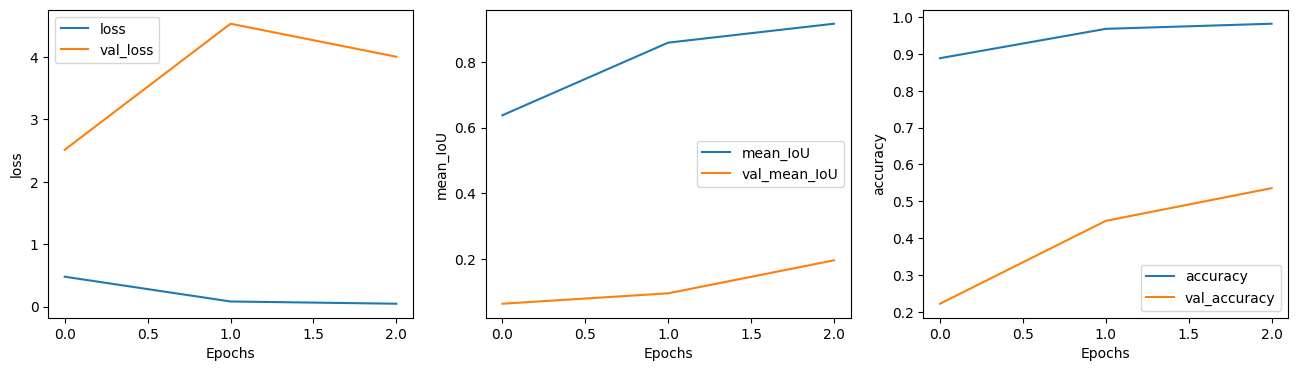

Training history for baseline_unet_aug model


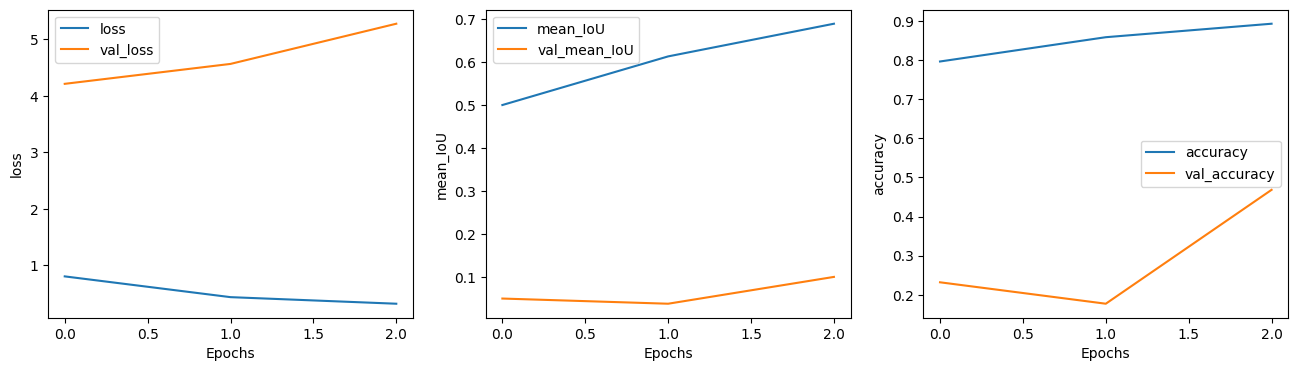

Training history for fpn model


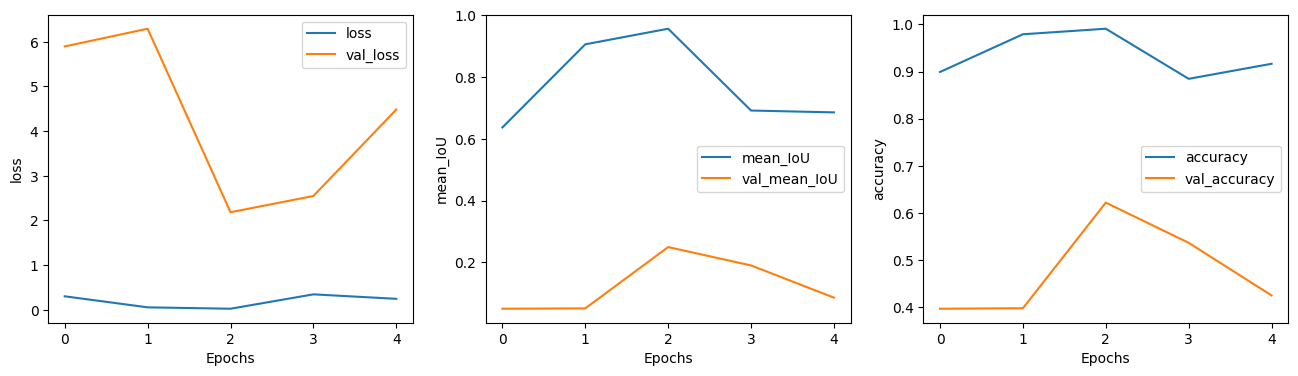

Training history for unet_vgg16 model


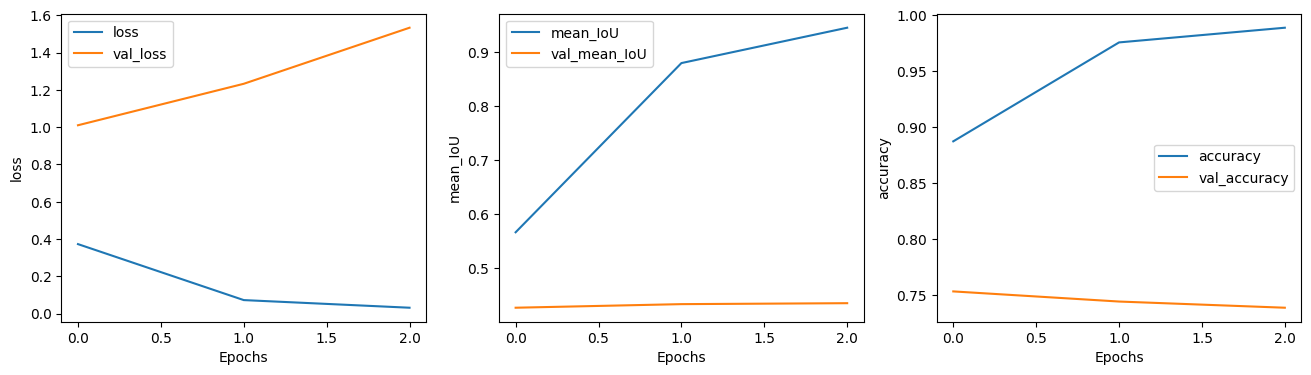

Training history for unet_vgg16_aug model


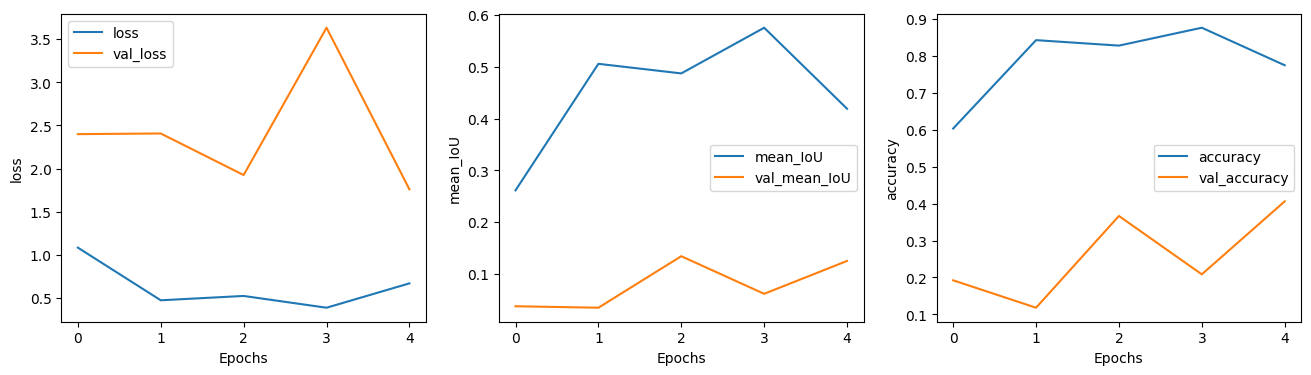

In [8]:
for model_name, model_history in models_history.items():
    print(f"Training history for {model_name} model")
    plot_graphs(model_history)

# Prédictions

In [32]:
predictions = {}
for model_name in tqdm(os.listdir("checkpoints/")):
    print("Loading model", model_name)
    model = tf.keras.models.load_model(
        "checkpoints"+f'/{model_name}',
        custom_objects={'mean_IoU': score_IoU, 'dice_coeff': dice_coeff})
    print("Generating prediction data")
    val_preds = model.predict(valGen2)
    predictions[model_name] = val_preds
    K.clear_session()
    print(" ")

  0%|          | 0/6 [00:00<?, ?it/s]

Loading model baseline_unet.h5
Generating prediction data
25/25 [==============================] - 69s 3s/step
 
Loading model baseline_unet_aug.h5
Generating prediction data
25/25 [==============================] - 70s 3s/step
 
Loading model fpn.h5
Generating prediction data
25/25 [==============================] - 237s 9s/step
 
Loading model fpn_aug.h5
Generating prediction data
25/25 [==============================] - 249s 10s/step
 
Loading model unet_vgg16.h5
Generating prediction data
25/25 [==============================] - 148s 6s/step
 
Loading model unet_vgg16_aug.h5
Generating prediction data
25/25 [==============================] - 150s 6s/step
 


  0%|          | 0/6 [00:00<?, ?it/s]

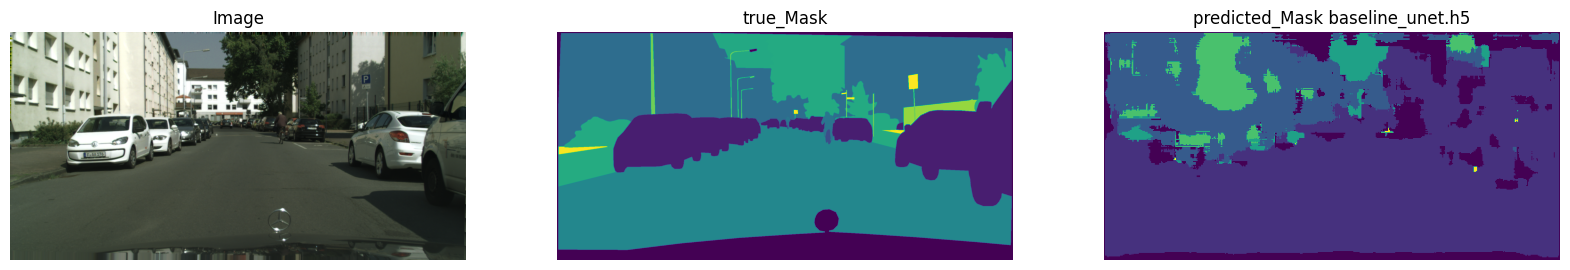

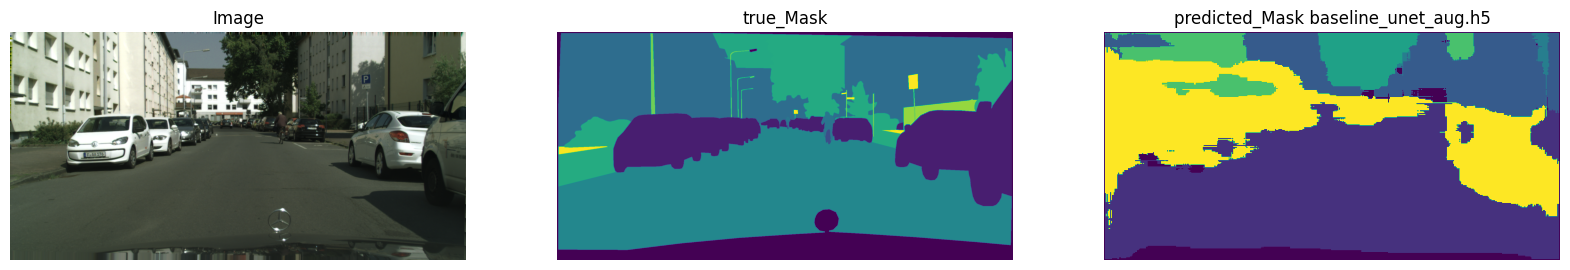

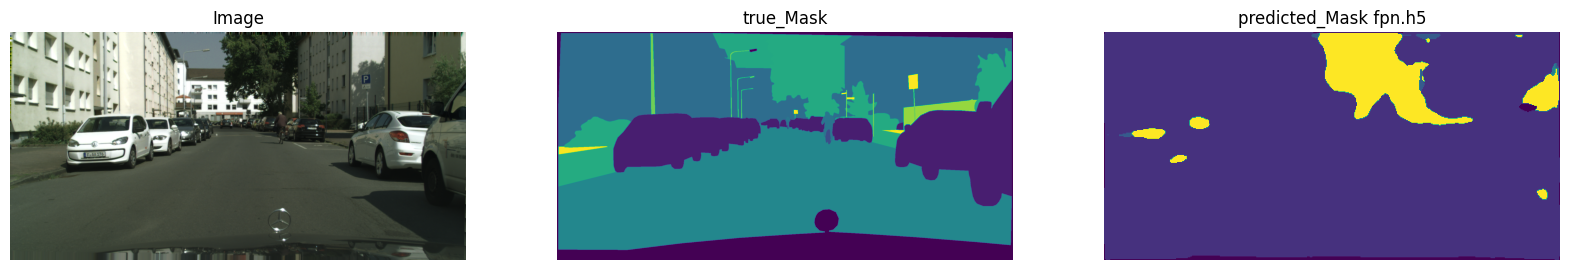

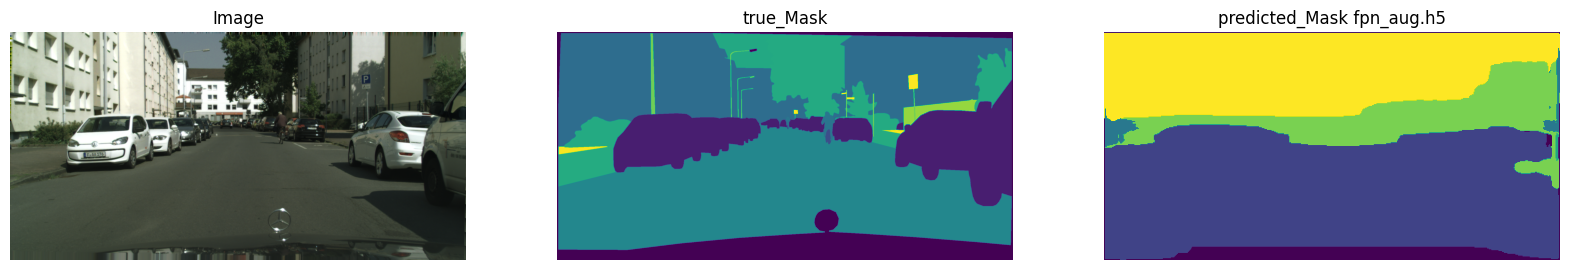

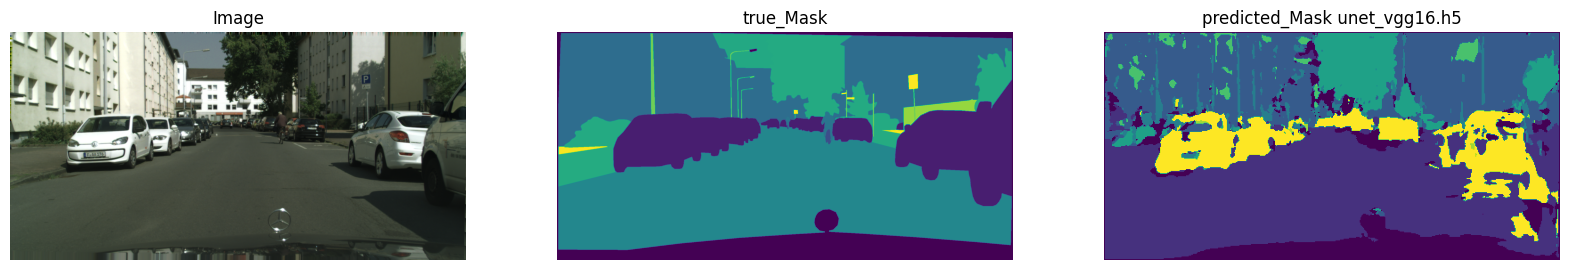

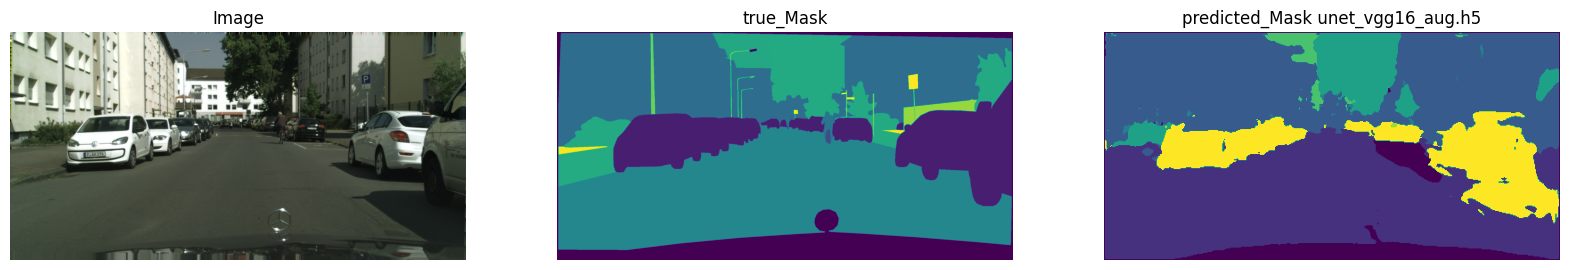

In [42]:
i=random.randint(0, 10)
for model_name, prediction in tqdm(predictions.items()):
    image = img_to_array(load_img(f'{val_imgs[i]}'))/255.

    mask = img_to_array(load_img(f'{val_masks[i]}', color_mode="grayscale"))
    mask = np.squeeze(mask)

    pred_mask = np.argmax(prediction[i], axis=-1)
    pred_mask = np.expand_dims(pred_mask, axis=-1)
    pred_mask = np.squeeze(pred_mask)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(1, 3, 1)
    ax.set_title('Image')
    ax.imshow(image)
    ax.axis('off')

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title('true_Mask')
    ax2.imshow(mask)
    ax2.axis('off')

    ax1 = fig.add_subplot(1, 3, 3)
    ax1.set_title(f'predicted_Mask {model_name}')
    ax1.imshow(pred_mask)
    ax1.axis('off')

# Analyse des modèles

In [34]:
import plotly.express as px

In [35]:
models_results_files = glob.glob(os.path.join("model_results/", "*.csv"))
models_results = pd.concat((pd.read_csv(f) for f in models_results_files), ignore_index=True)
models_results.style.background_gradient()

Le temps d'entraînement est en secondes.

In [48]:
models_results[
    ["model_name", "training_time", "val_loss", "val_mean_IoU", "val_accuracy"]].set_index("model_name").style.background_gradient()

In [37]:
metrics = list(models_results.columns)
metrics.remove("model_name")
metrics

['training_time', 'val_loss', 'val_mean_IoU', 'val_dice_coeff', 'val_accuracy']

In [38]:
fig = px.bar(models_results, x="model_name", y=metrics, text_auto=True)
fig.show()

# Conclusion

Pour rappel, plus le score de perte tend vers 0, plus le score est bon. Le modèle UNET VGG16 est celui qui possède un meilleur score.

Pour le score IoU également, le modèle UNET VGG16 est celui qui possède le meilleur score avec **0.563** contre **0.211** pour la baseline et **0.100** pour le modèle FPN.

Le modèle FPN est celui qui est le plus gourmand en ressource avec un temps d’entraînement de **~10h**. Le modèle UNET VGG16 a pris **~3h30** seulement pour l’entraînement.

Grâce à l’augmentation des données pour le modèle UNET VGG16, on est passé d’un score IoU de **0.563** à **0.584**.

Même si le score “accuracy” n’a pas été pris en compte dans les métriques, il permet tout de même d’avoir une idée générale des performances des modèles. On observe une amélioration de la majorité des modèles grâce à l’utilisation de l’augmentation de données.

Le modèle UNET VGG16 est meilleur que les autres modèles sur tous les scores avec un temps d’entraînement raisonnable. C’est donc le modèle UNET VGG16 qui a été retenue pour la suite du projet. Néanmoins, des améliorations sont encore possibles afin d’augmenter les performances du modèle. Par exemple, en effectuant une meilleure hyper-optimisation ou en modifiant l’augmentation des données, de sorte à obtenir une amélioration significative.


Pour aller plus loin, ce lien répertorie tous les modèles qui ont été testés sur le jeu de données de cityscape et effectue une comparaison.